Monte Carlo simulation for the **quadratic rough Heston model:**
$$
\begin{aligned}
dS_t&=S_t\sqrt{V_t}dW_t \\
V_t&=a(Z_t-b)^2+c
\end{aligned}
$$
where $W$ is a Brownian motion and $a,\,b,\,c>0$. This model is of rought Heston type, in the sense that weighted past price returns are drivers of the volatility dynamics:
$$Z_t=\int_0^t(t-s)^{\alpha-1}\frac{\lambda}{\Gamma(\alpha)}(\theta_0(s)-Z_s)ds+\int_0^t(t-s)^{\alpha-1}\frac{\lambda}{\Gamma(\alpha)}\eta\sqrt{V_s}dW_s$$
with $\alpha\in(1/2,\,1),\,\lambda>0,\,\eta>0$ and $\theta_0$ a deterministic function.

For simplicity, $\theta_0(t)=\cfrac{Z_0}{\lambda\Gamma(1-\alpha)}t^{-\alpha}$, so we have
$$Z_t=Z_0-\int_0^t(t-s)^{\alpha-1}\frac{\lambda}{\Gamma(\alpha)}Z_sds+\int_0^t(t-s)^{\alpha-1}\frac{\lambda}{\Gamma(\alpha)}\eta\sqrt{V_s}dW_s$$

The parameters to calibrate are $v=(\alpha, \lambda, a,b,Z_0)$(Note that we can always take $\eta=1$ up to a rescaling of the other parameters).

In [1]:
%config Completer.use_jedi=False
import numpy as np
import pandas as pd
import scipy.stats as sps
import math
from scipy.special import gamma
import matplotlib.pyplot as plt

In [2]:
alpha = np.linspace(0.5, 1.0, 100)
Lambda = np.linspace(0, 10, 100)
Z_0 = np.linspace(0, 1, 100)
a = np.linspace(0, 1, 100)
b = np.linspace(0,1,100)
c = np.linspace(0, 0.1, 100)

$$
\begin{aligned}
    dS_t &= \sqrt{V_t}S_tdW_t, \quad \text{for}\; t>0,\,S_0=s_0,\\
    dV_t &= a(b-V_t)dt+v\sqrt{V_t}dZ_t,\quad \text{for}\; t>0,\,V_0=v_0,
\end{aligned}
$$
with $W,\,Z$ brownian motions of the correlation $dW_tdZ_t=\rho\in[-1,\,1],\; a,\,b,\,v,\,v_0>0$ and $2ab>v^2$. The model is denoted by $\mathcal{M}^{Heston}(\theta)$ with $\theta=(a,\,b,\,v,\,\rho,\,v_0)\in\Theta^{Heston}\subset\mathbb{R}^5$.

In [22]:
def HestonMC(s0, a, b, v, v0, rho, T, dt):
    # Generate a Monte Carlo simulation for the Heston model
    # Generate a Brownian Motion
    Mu = np.zeros(2)
    Cov = np.array([[1, rho], [rho, 1]])
    W = np.random.multivariate_normal(Mu, Cov, T)
    W_t = W[:, 0]
    Z_t = W[:, 1]
    
    # Generate paths
    vt = np.zeros(T)
    vt[0] = v0
    St = np.zeros(T)
    St[0] = s0
    
    for t in range(1, T):
        vt[t] = vt[t-1] + a*(b-vt[t-1])*dt + v*np.sqrt(np.abs(vt[t-1])*dt)*Z_t[t]
        St[t] = St[t-1] + np.sqrt(vt[t-1]*dt)*St[t-1]*W_t[t]
    
    return St, vt
    
    
    

In [26]:
T = 252
dt = 1/252
s0 = 100
a = 0.3
b = 0.2
v = 0.2
v0 = 0.2
S, V = HestonMC(s0, a, b, v, v0, rho, T, dt)


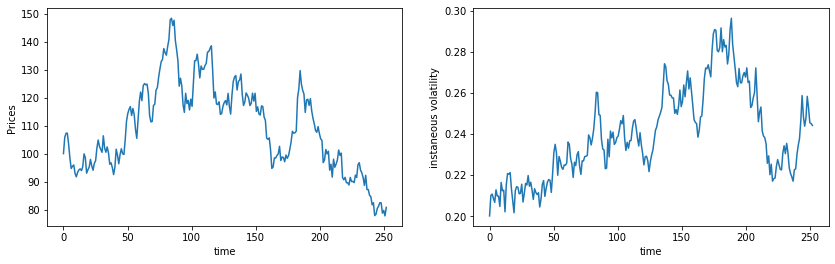

In [36]:
S, V = HestonMC(s0, a, b, v, v0, rho, T, dt)
time = np.linspace(0,T, T)
f = plt.figure(figsize=(14,4))
ax1 = plt.subplot(121)
ax1.plot(time, S)
ax1.set_xlabel("time")
ax1.set_ylabel("Prices")


ax2 = plt.subplot(122)
ax2.plot(time, V)
ax2.set_xlabel("time")
ax2.set_ylabel("instaneous volatility")
plt.show()

In [6]:
def Z_generator(alpha, Lambda,Z_0, N):
    step_size = 1/N
    
    
    
    

1.2421693445043054

In [15]:
rho=0.1
T=10
Mu = np.zeros(2)
Cov = np.array([[1, rho], [rho, 1]])
W = np.random.multivariate_normal(Mu, Cov, T)
W_t = W[:, 0]
Z_t = W[:, 1]

In [18]:
W_t,Z_t

(array([-0.96812974,  0.1920145 ,  0.01370971,  0.39331408,  0.2616596 ,
         0.67012431,  0.28723435,  2.14828277,  0.40529769, -0.67007869]),
 array([-1.84794502, -0.56420876, -0.66204176, -0.4599466 , -1.21536666,
        -1.61335353, -1.36970383, -0.5294492 , -1.13131664, -0.38910445]))

In [5]:
import numpy as np
import timeit
# from timeit import timeit

In [63]:
n = 5000
A = np.random.randn(n, n).astype(np.float32)
B = np.random.randn(n, n).astype(np.float32)
t = timeit.repeat("np.matmul(A, B)", "import numpy as np;from __main__ import A, B", repeat=1, number=3)

In [15]:
t 

[5.199999998239946e-05,
 5.900000019209983e-06,
 5.600000008598727e-06,
 5.499999986113835e-06,
 5.599999951755308e-06,
 5.600000008598727e-06,
 5.499999986113835e-06,
 1.5599999983351154e-05,
 1.1599999993450183e-05,
 9.599999998499698e-06]

In [21]:
import tensorflow as tf
tf.__version__, tf.device

('2.3.0', <function tensorflow.python.framework.ops.device_v2(device_name)>)

In [17]:
dir(tf)

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 '_API_MODULE',
 '_LazyLoader',
 '__all__',
 '__builtins__',
 '__cached__',
 '__compiler_version__',
 '__cxx11_abi_flag__',
 '__doc__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__monolithic_build__',
 '__name__',
 '__operators__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_absolute_import',
 '_api',
 '_compat',
 '_current_file_location',
 '_current_module',
 '_distutils',
 '_division',
 '_estimator_module',
 '_fi',
 '_inspect',
 '_ll',
 '_logging',
 '_main_dir',
 '_major_api_version',
 '_module_dir',
 '

In [29]:
device_spec = tf.DeviceSpec(job ="localhost:8888", device_type = "CPU")
  
# Printing the DeviceSpec 
print('Device Spec: ', device_spec.to_string())
device_spec

Device Spec:  /job:localhost:8888/device:CPU:*


In [26]:
device_spec = tf.DeviceSpec(job ="localhost", replica = 0, device_type = "GPU")
  
# Printing the DeviceSpec 
print('Device Spec: ', device_spec.to_string())

Device Spec:  /job:localhost/replica:0/device:GPU:*


In [44]:
with tf.device("/cpu:0"):
    C = tf.constant(A)
    D = tf.constant(B)
    CD = tf.matmul(C, D)
CD

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[ 0.45107672,  0.13264763,  0.7442775 , -0.16508792, -0.15152718],
       [-1.1479267 , -1.7522138 , -1.4438903 , -1.7002357 ,  3.2878783 ],
       [ 0.02466268, -0.21215943, -0.7682214 , -0.419541  , -1.253257  ],
       [ 1.7430866 , -2.7795684 , -0.7252006 , -2.222324  ,  0.88769835],
       [ 0.9575222 ,  0.7269226 ,  0.03884112, -0.44522867,  0.05769297]],
      dtype=float32)>

In [65]:
with tf.compat.v1.Session() as sess:
#     with tf.device("/cpu:0"):
    C = tf.constant(A)
    D = tf.constant(B)
    CD = tf.matmul(C, D)
    t = timeit.repeat("sess.run(CD)", setup="import tensorflow as tf;from __main__ import sess, A, B, CD", repeat=1,number=1)
print(np.mean(t))

6.411051799999768


In [75]:
tf.cast?

In [32]:
G = tf.random.normal([n, n])
H = tf.random.normal([n, n])
GH = tf.matmul(G, H)

In [49]:
from tensorflow.python.client import timeline
with tf.compat.v1.Session() as sess:
    G = tf.random.normal([n, n])
    H = tf.random.normal([n, n])
    GH = tf.matmul(G, H)
    options = tf.compat.v1.RunOptions(trace_level=tf.compat.v1.RunOptions.FULL_TRACE)
    run_metadata = tf.compat.v1.RunMetadata()
    sess.run(GH, options=options, run_metadata=run_metadata)
    fetched_timeline = timeline.Timeline(run_metadata.step_stats)
    chrome_trace = fetched_timeline.generate_chrome_trace_format()
    with open('timeline_Matmul.json', 'w') as f:
        f.write(chrome_trace)

In [67]:
with tf.compat.v1.Session() as sess:
    G = tf.random.normal([n, n])
    H = tf.random.normal([n, n])
    GH = tf.matmul(G, H)
    t = timeit.repeat("sess.run(GH)", setup="import tensorflow as tf;from __main__ import sess, G, H, GH", repeat=1,number=1)
print(np.mean(t))

3.3061227999996845


In [56]:
tf.config.experimental.list_physical_devices('CPU') 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [72]:
np.full(2, 3)

array([3, 3])

In [73]:
tf.__version__

'2.3.0'

In [90]:
x = tf.Variable(tf.zeros(shape=[5, 4],dtype=tf.float32))
y = x[:,1].assign(tf.constant([1,1,1,1,1], dtype=tf.float32))

In [91]:
y 

<tf.Variable 'UnreadVariable' shape=(5, 4) dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)>

In [93]:
import pandas as pd

In [94]:
impliedVols = np.loadtxt("Quadratic-rough-Heston/Data/parameters_impliedVols.txt")
impliedVols.shape

(7997, 123)

In [111]:
# df = pd.DataFrame(data=impliedVols, columns=[''])
params = ['alpha','lambda','a','b', 'c', 'Z0']
columns = params + ['implided volatilities']
df_params = impliedVols[:, :6]
df_params
ivs = impliedVols[:, 6:]
df = pd.DataFrame(data=df_params, columns=params)
df.loc[:, 'implied volatilities'] = None
for i in range(len(impliedVols)):
    df.loc[i,  'implied volatilities'] = [ivs[i]] 

ValueError: Must have equal len keys and value when setting with an ndarray

In [110]:
pd.DataFrame(data=df_params, columns=params)

,alpha,lambda,a,b,c,Z0
0,0.5907,0.7923,0.5395,0.4816,0.0020,0.0593
1,0.6473,1.4843,0.5342,0.3343,0.0079,0.1080
2,0.5237,1.0408,0.6660,0.4745,0.0072,0.1081
3,0.5946,1.4684,0.5505,0.4148,0.0022,0.1780
4,0.5528,0.7131,0.6432,0.4255,0.0090,0.0654
...,...,...,...,...,...,...
7992,0.6258,1.0622,0.6407,0.3959,0.0079,0.1469
7993,0.5077,1.3919,0.5044,0.4566,0.0073,0.2332
7994,0.5215,1.0665,0.7106,0.2202,0.0079,0.0585
7995,0.6470,1.4487,0.6284,0.3359,0.0007,0.0578


In [4]:
a = np.ones((3, 2)) 
b = np.array([2,2])
np.dot(a, b)
a@b 

array([4., 4., 4.])

In [118]:
tf.math.reduce_sum(tf.multiply(a, b), axis=1)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([4., 4., 4.])>

In [119]:
tf.math.reduce_prod?

In [5]:
[1]+[[1,1],[2,3,4]]

[1, [1, 1], [2, 3, 4]]

In [7]:
for i in range(10):
    print(i, end='\r')